DATA SCIENCE & BUSINESS ANALYTICS TASKS

Task 3 : Exploratory Data Analysis - Retail

In [14]:
# Loading the dataset from the given link
import gdown
import pandas as pd

file_id = '1lV7is1B566UQPYzzY8R2ZmOritTW299S'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'samplesuperstore.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1lV7is1B566UQPYzzY8R2ZmOritTW299S
To: /content/samplesuperstore.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 96.1MB/s]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Exploring the Dataset

In [15]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [16]:
# numerical statistics about the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
# retrieving the columns in the dataset for ease of use
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [18]:
# checking for the missing values
missing_vals = df.isnull().sum()
print("\nMissing Values :\n",missing_vals)


Missing Values :
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


Performing Exploratory Data Analysis (EDA), i.e., exploring the data.

***Univariate Analysis***

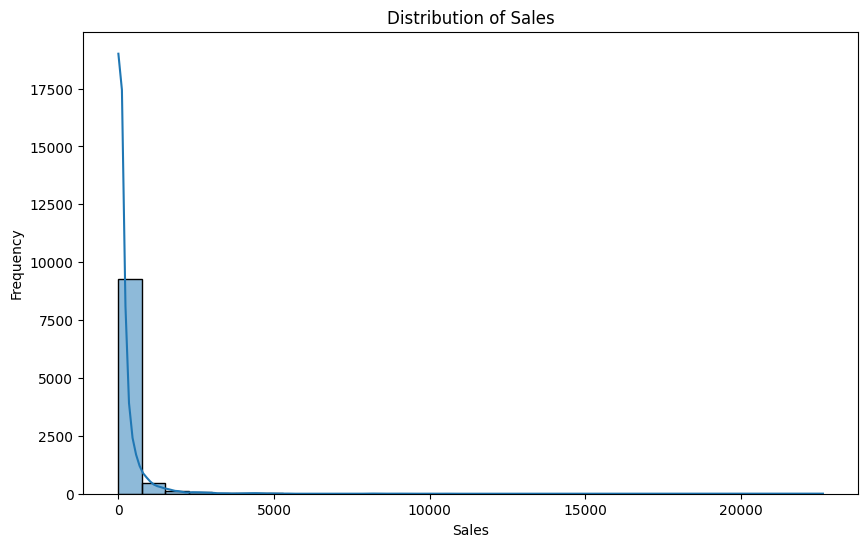

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of Sales
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()

*Interpretation of Sales Distribution*



Most sales are concentrated at the lower-end. This is indicative of the fact that there is a lot of potential to boost sales.

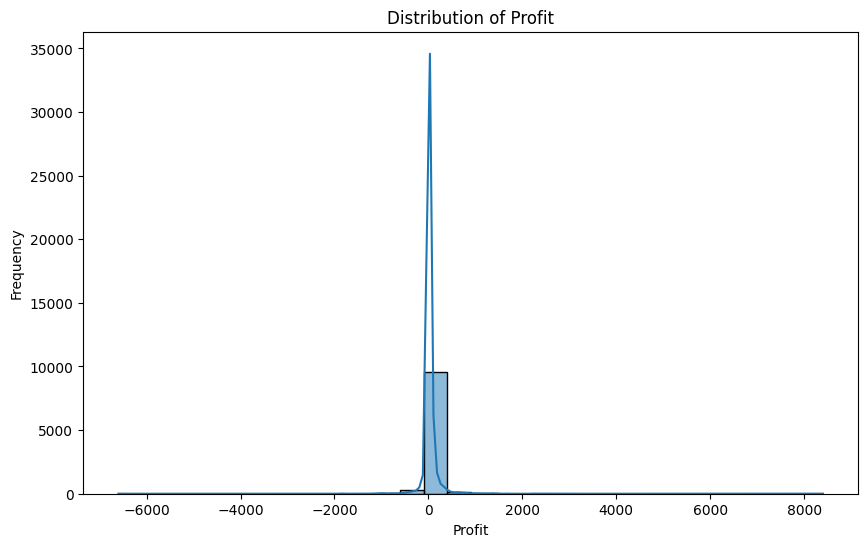

In [20]:
# Visualizing the Distribution of Profit
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Distribution of Profit")
plt.show()

*Interpretation of Profit Distribution*

Significant number of transactions are resulting in low or negative profit. The ratio of loss to profit is 6250/8250 3:4.

This is indicative of the fact that there is a lot of potential to boost profit and reduce losses.

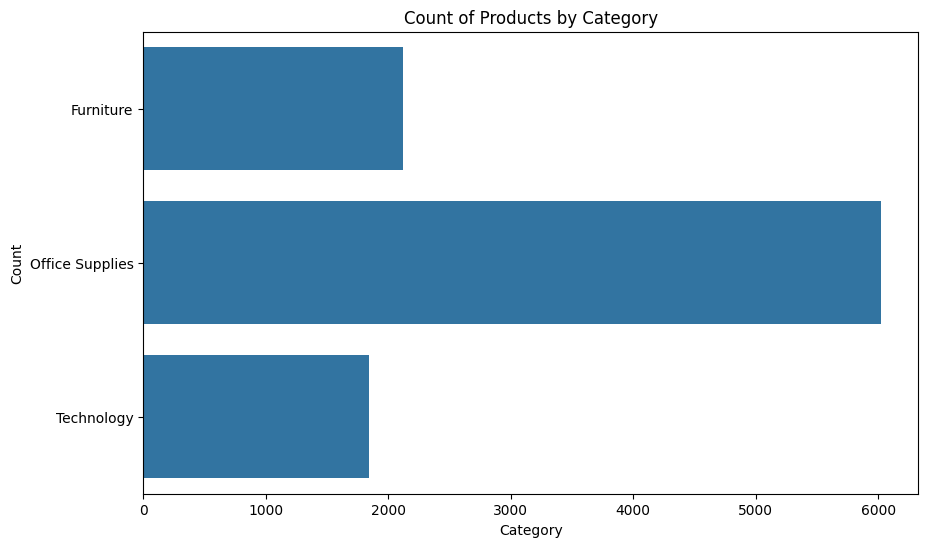

In [21]:
# Visualizing the Countplot of Category
plt.figure(figsize=(10,6))
sns.countplot(df['Category'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Products by Category")
plt.show()

***Bivariate Analysis***

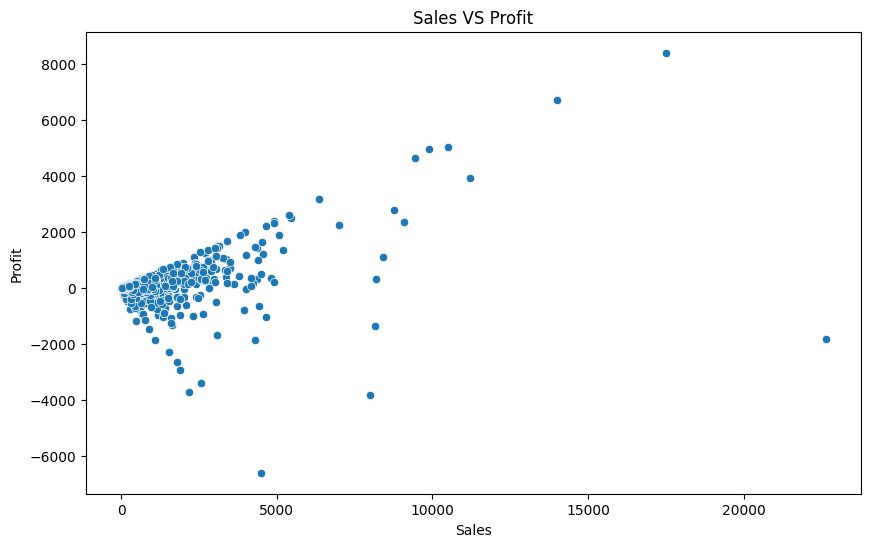

In [22]:
# Visualizing Sales vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales VS Profit")
plt.show()

*Interpretation of Sales VS Profit*


1. Positive Correlation between Sales & Profit.

2. As the sales is increasing, the profit is also increasing & there is reduction in losses.

3. However, very high sales is also found to be leading to loss, thus indicating the requirement of pricing control.

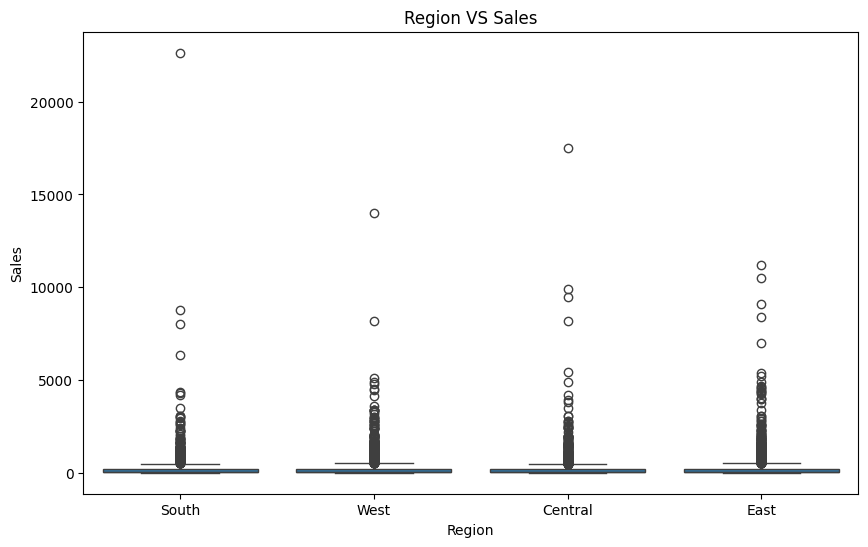

In [23]:
# Visualizing Region VS Sales
plt.figure(figsize=(10,6))
sns.boxplot(x="Region", y="Sales", data=df)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Region VS Sales")
plt.show()

*Interpretation of Region VS Sales*

1. There is variability in Sales as per the region.

2. It is found that there are high sales in the Central region, followed by the Western region, then the Eastern region & least sales in the Southern region.

3. In areas like the Southern region, targeted strategies can be leveraged to boost sales.

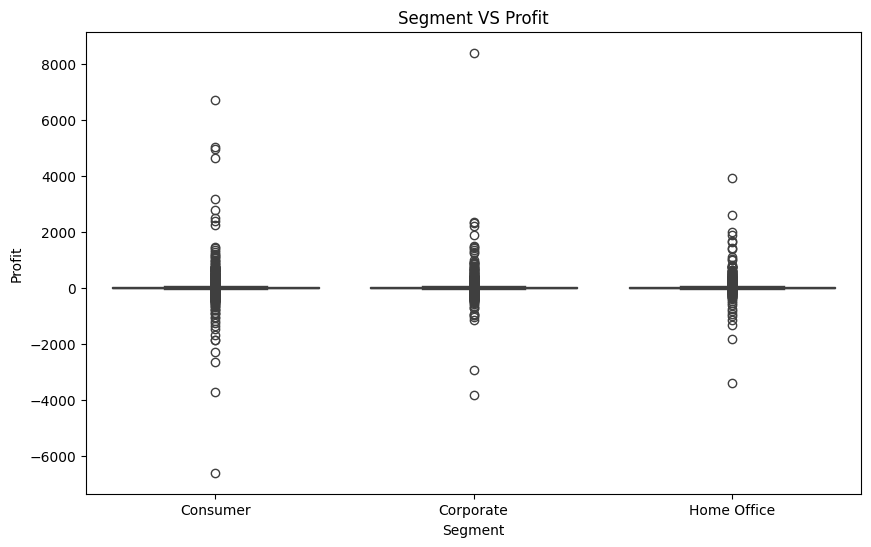

In [24]:
# Visualizing Segment VS Profit
plt.figure(figsize=(10,6))
sns.boxplot(x="Segment", y="Profit", data=df)
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.title("Segment VS Profit")
plt.show()

*Interpretation of Segment VS Profit*

1. There is variability in Profit as per the Segment.

2. It is found that the maximum profit is from the Consumer segment, followed by the Home Office segment, & least profit from the Corporate segment.

3. In segment like the Corporate, targeted strategies can be leveraged to boost sales.

***Multivariate Analysis***

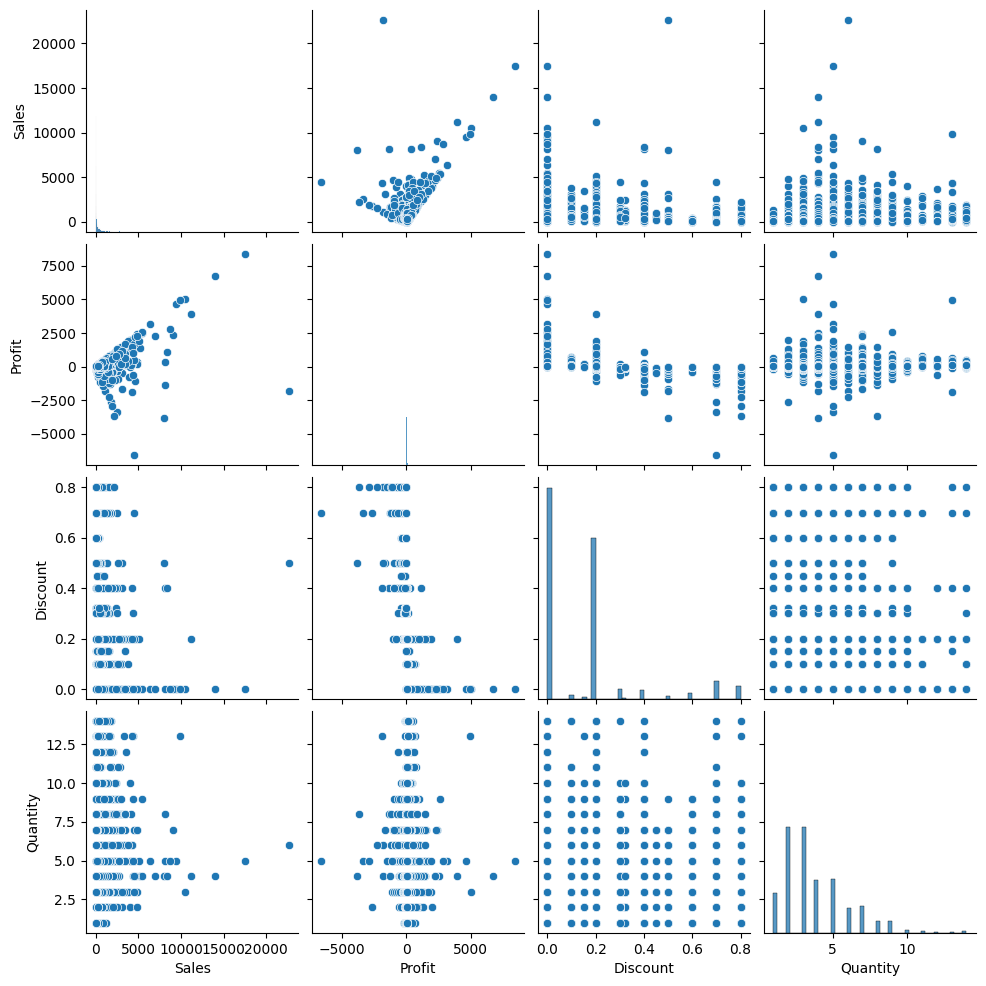

In [25]:
# Visualizing the Pairplot of numerical features
sns.pairplot(df[['Sales','Profit','Discount','Quantity']])
plt.show()

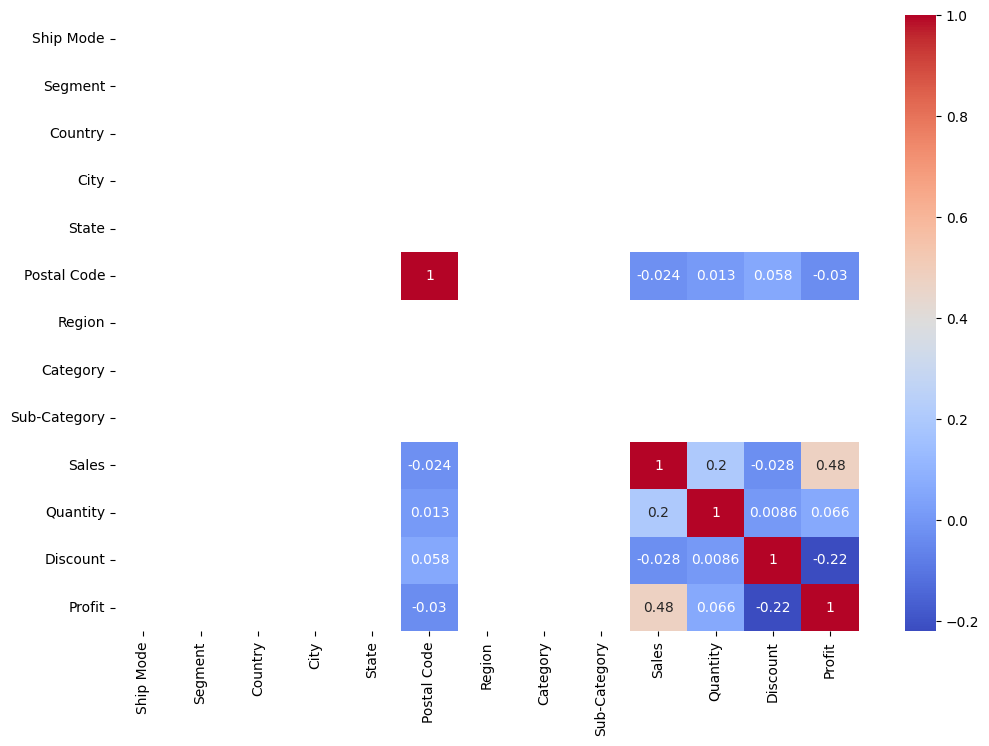

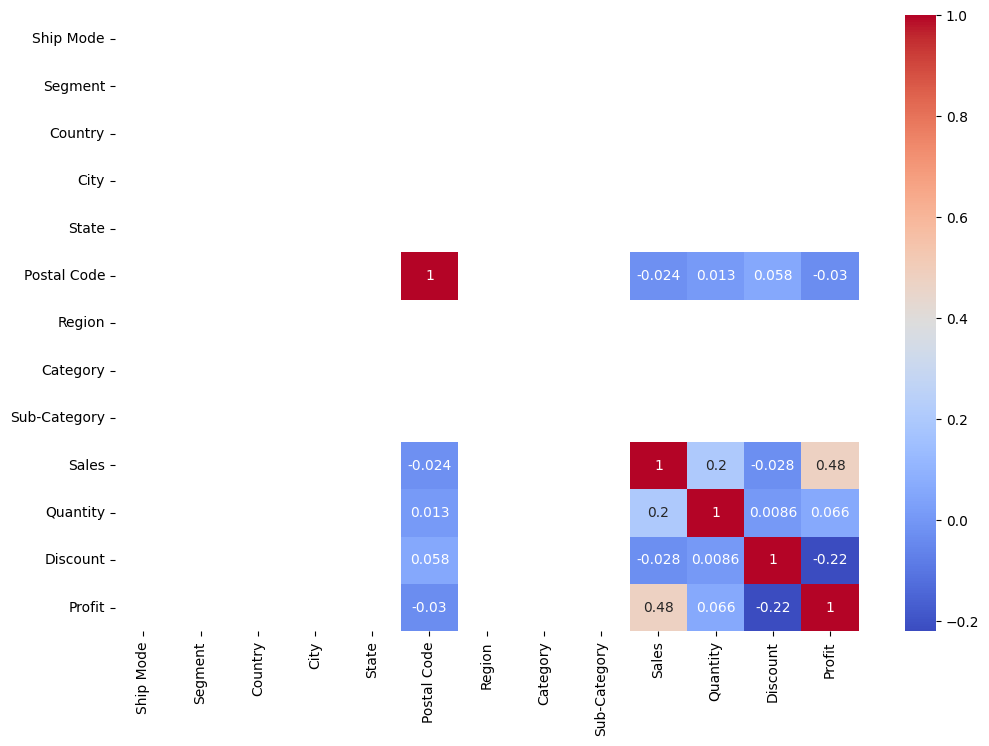

In [26]:
# Visualizing the Correlation Heatmap

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=["object"]).columns

# Convert non-numeric columns to numeric
for col in non_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    except:
        # Handle columns that cannot be converted
        pass

# Recalculate the correlation matrix
df_corr = df.corr()

# Visualize the Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

*Interpretation of the Correlation Heatmap*

Correlation Heatmap is highlighting the relationships between the features :

1. There is a moderately positive correlation between Sales & Profit (0.48). This indicates that the profit tends to increase with the increase in sales. However, this relationship is not very strong, indicating that there are other factors which are significantly impacting the profit.

2. There is a weak negative correlation between Sales & Discount (-0.028).

3. There exists a moderately negative correlation between Profit & Discount (-0.22). Higher discounts result in lower profits. Thus, it suggests that aggressive discounting might erase the profit margins completely.

4. There is a very weak positive correlation between Quantity & Profit (0.066). Selling more items should lead to higher profits, but this relationship is very weak here, indicating that there are factors that are heavily impacting the profits (Cost, Pricing Strategies etc.).

5. There is a very weak positive correlation between Quantity & Discount (0.0086). In this case, higher dicounts do not have a significant increase in the quantity sold. Thus, it indicates that discount strategies are not effectivei in boosting the sales.

Identify weak areas to improve Profit

In [27]:
# Initially, grouping data by Region & Category to find regions with low profit
region_category_profit = df.groupby(['Region','Category'])['Profit'].sum().reset_index()
print(region_category_profit.sort_values(by="Profit"))

Empty DataFrame
Columns: [Region, Category, Profit]
Index: []


Deriving the Business Problems

In [28]:
# checking the sub-category which is yielding the least profit
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
print(sub_category_profit.sort_values(by="Profit"))

Empty DataFrame
Columns: [Sub-Category, Profit]
Index: []


In [29]:
# checking the impact of discount on profit
disc_profit = df.groupby('Discount')['Profit'].sum().reset_index()
print(disc_profit.sort_values(by="Profit"))

    Discount       Profit
10      0.70  -40075.3569
11      0.80  -30539.0392
6       0.40  -23057.0504
8       0.50  -20506.4281
4       0.30  -10369.2774
9       0.60   -5944.6552
7       0.45   -2493.1111
5       0.32   -2391.1377
2       0.15    1418.9915
1       0.10    9029.1770
3       0.20   90337.3060
0       0.00  320987.6032


*Interpretation :*

1. **Ineffective Discount Strategies** - The negative impact of Discount on Profit is indicating that the current discounting strategies might not be optimal. Here, the business problem is to find the balance between offering attractive discounts & boosting sales to maintain decent and healthy profit margins. Perhaps, data-driven insights can be used to implement an effective discount model, thus promoting informed decision-making.


2. **Variability in Segment Profitability** - The variability in sales & profits as per segments indicate that some segments are not being served as effectively as others. Here, Customer segment is served more effectively. Targeted Marketing strategies and Product Development as per the needs & specifications of the Corporate & Home Office segments shaould be implemented.

Creating Dashboards for Visualization

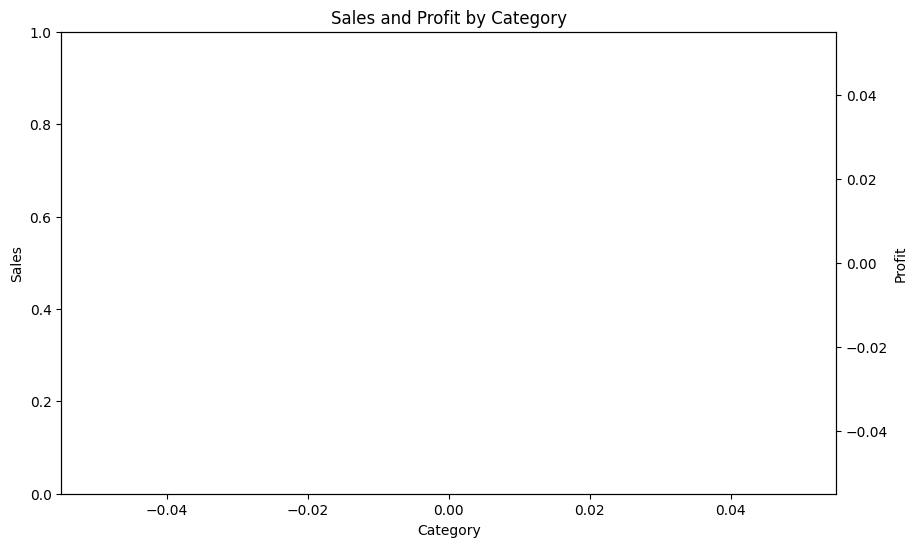

In [30]:
# Visualizing the Sales & Profit Analysis by Category
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales_profit, ax=ax1, color='b')
ax2 = ax1.twinx()
sns.lineplot(x='Category', y='Profit', data=category_sales_profit, ax=ax2, color='r', marker='o')

ax1.set_title('Sales and Profit by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Profit')
plt.show()

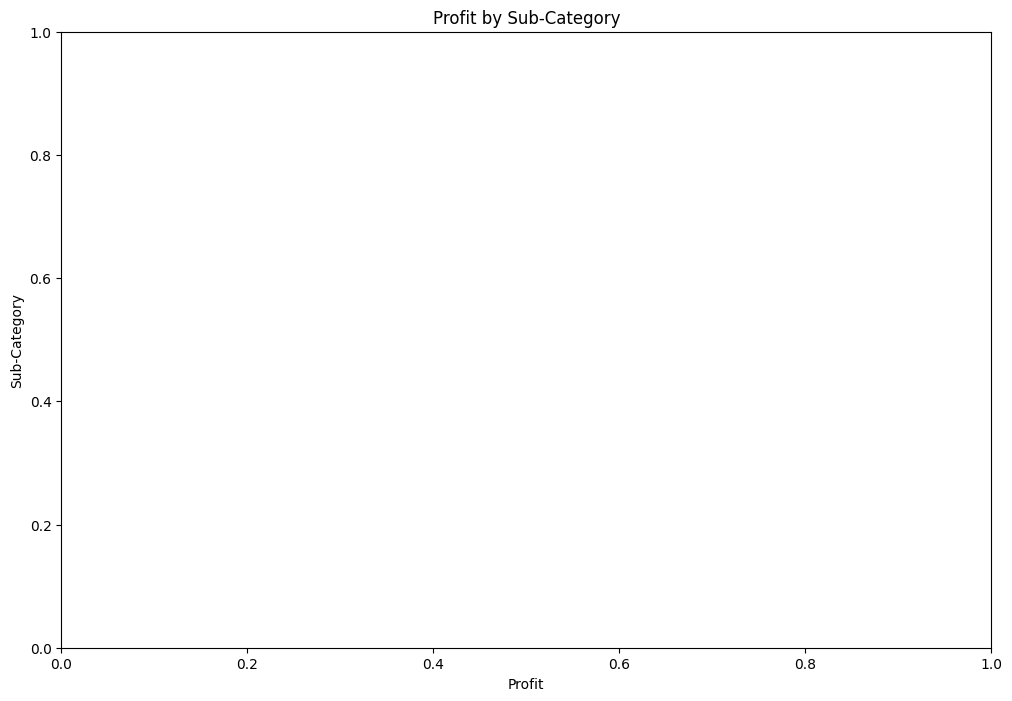

In [31]:
# Visualizing the Profit Analysis by Sub-Category
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Sub-Category', data=sub_category_profit.sort_values(by='Profit'))
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

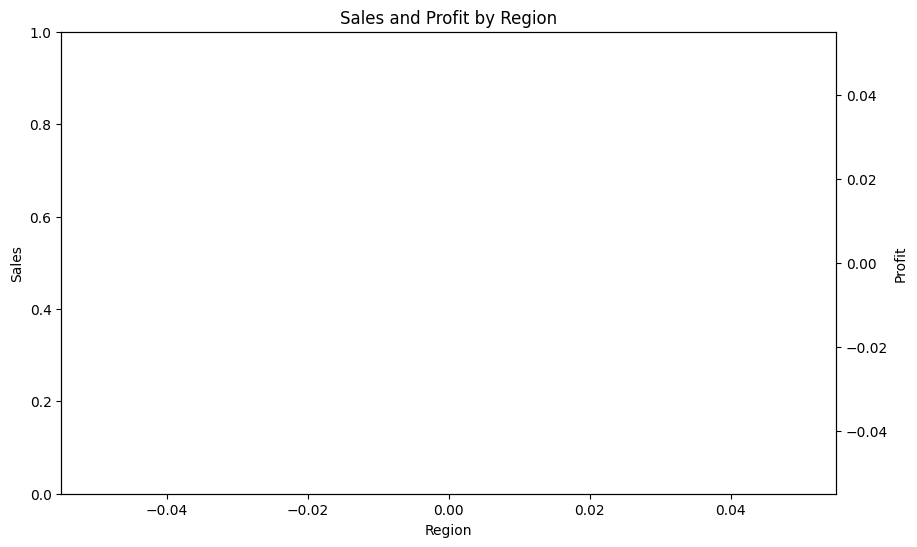

In [32]:
# Visualizing the Sales & Profit Analysis by Region
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales_profit, ax=ax1, color='b')
ax2 = ax1.twinx()
sns.lineplot(x='Region', y='Profit', data=region_sales_profit, ax=ax2, color='r', marker='o')

ax1.set_title('Sales and Profit by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Profit')
plt.show()